# Importing Libraries

In [693]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, MaxPooling1D, BatchNormalization, GlobalAveragePooling2D, Rescaling
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
import torchvision.transforms as transforms
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import tensorflow as tf
import pandas as pd 
import splitfolders
import numpy as np
import cv2
import os



# Splitting the dataset into 2 sets Train and Validation (High Quality Dataset)

In [694]:
input_folder = "D:\RHUL\project\Input_dataset"
output = "D:\RHUL\project\processed_data"
splitfolders.ratio(input_folder, output, seed=42, ratio=(0.6,0.4))

In [695]:
img_height, img_width = (224,224)
batch_size = 24

train_data_dir = r"D:\RHUL\project\processed_data\train"
valid_data_dir = r"D:\RHUL\project\processed_data\val"
test_data_dir = r"D:\RHUL\project\test_high"

In [696]:
CATEGORIES = ["alpha","beta","chi","delta","epsilon","eta","gamma","iota","kappa","lambda","mu","nu","omega","omicron","phi","pi","psi","rho","sigma","tau","theta","upsilon","xi","zeta"]

In [697]:
CATEGORIES

['alpha',
 'beta',
 'chi',
 'delta',
 'epsilon',
 'eta',
 'gamma',
 'iota',
 'kappa',
 'lambda',
 'mu',
 'nu',
 'omega',
 'omicron',
 'phi',
 'pi',
 'psi',
 'rho',
 'sigma',
 'tau',
 'theta',
 'upsilon',
 'xi',
 'zeta']

In [698]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=False,
                                  validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 96 images belonging to 24 classes.
Found 24 images belonging to 24 classes.


In [699]:
x_train, y_train = train_generator.next()
x_train.shape

(24, 224, 224, 3)

In [700]:
x_valid,y_valid = valid_generator.next()
x_valid.shape

(24, 224, 224, 3)

In [701]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=False)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 96 images belonging to 24 classes.


In [702]:
x_test,y_test = test_generator.next()
x_test.shape

(24, 224, 224, 3)

In [703]:
x_test

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


# ResNet50 with High quality greek letters dataset

In [257]:
model = ResNet50(include_top=False, weights='imagenet')
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
p = Dense(train_generator.num_classes, activation='softmax')(x)
model_ResNet50_high = Model(inputs=model.input, outputs=p)

for layer in model.layers:
    layer.trainable = False
    
tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    epsilon=1e-07,
    name="adam"
)
    
model_ResNet50_high.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model_ResNet50_high.fit(train_generator, epochs = 15)

Epoch 1/15
4/4 [==============================] - 13s 3s/step - loss: 4.6843 - accuracy: 0.1250
Epoch 2/15
4/4 [==============================] - 11s 2s/step - loss: 2.7775 - accuracy: 0.5938
Epoch 3/15
4/4 [==============================] - 11s 2s/step - loss: 1.0512 - accuracy: 0.8438
Epoch 4/15
4/4 [==============================] - 11s 2s/step - loss: 0.2878 - accuracy: 0.9479
Epoch 5/15
4/4 [==============================] - 11s 2s/step - loss: 0.2464 - accuracy: 0.9271
Epoch 6/15
4/4 [==============================] - 11s 3s/step - loss: 0.1153 - accuracy: 0.9792
Epoch 7/15
4/4 [==============================] - 11s 3s/step - loss: 0.0593 - accuracy: 0.9896
Epoch 8/15
4/4 [==============================] - 11s 3s/step - loss: 0.0273 - accuracy: 1.0000
Epoch 9/15
4/4 [==============================] - 11s 2s/step - loss: 0.0596 - accuracy: 0.9792
Epoch 10/15
4/4 [==============================] - 11s 2s/step - loss: 0.0098 - accuracy: 1.0000
Epoch 11/15
4/4 [======================

In [258]:
model_ResNet50_high.evaluate(x_valid, y_valid)

1/1 [==============================] - 3s 3s/step - loss: 0.2642 - accuracy: 0.9167


[0.26421117782592773, 0.9166666865348816]

In [301]:
test_acc = []
test_error = []

In [302]:
results = model_ResNet50_high.evaluate(x_test, y_test)

1/1 [==============================] - 4s 4s/step - loss: 0.1828 - accuracy: 0.9583


In [303]:
test_error.append(results[0])
test_acc.append(results[1])

In [704]:
predictions = model_ResNet50_high.predict(x_test)

In [705]:
np.argmax(predictions[0])

2

In [706]:
y_test[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [708]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    print("predicted_label = ",predicted_label)
    l = list(true_label)
    print("true_label in boolean list =",l)
    n = list(true_label).index(1)
    print("true_label after converting to integer =",n)
    if predicted_label == n:
        color = 'blue'
    else:
        color = "red"

    plt.xlabel("{} {:2.0f}% ({})".format(CATEGORIES[predicted_label],
                                100*np.max(predictions_array),
                                CATEGORIES[n]),
                                color=color,
                                size=20)   
def plot_prediction_array(i, predictions_array, true_label):
    true_label = any(true_label[i])
    plt.grid(False)
    plt.xticks(range(24))
    plt.yticks([])
    thisplot = plt.bar(range(24), predictions_array, color="blue")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  2
true_label in boolean list = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 2


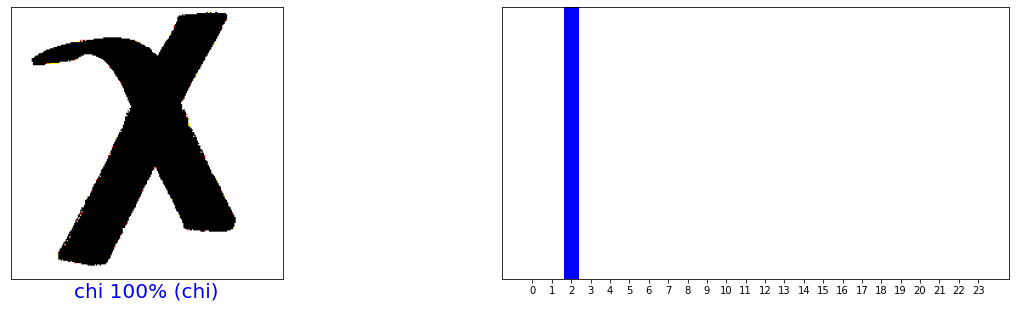

In [709]:
import numpy as np
i = 0
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions[i], y_test)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  7
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 7


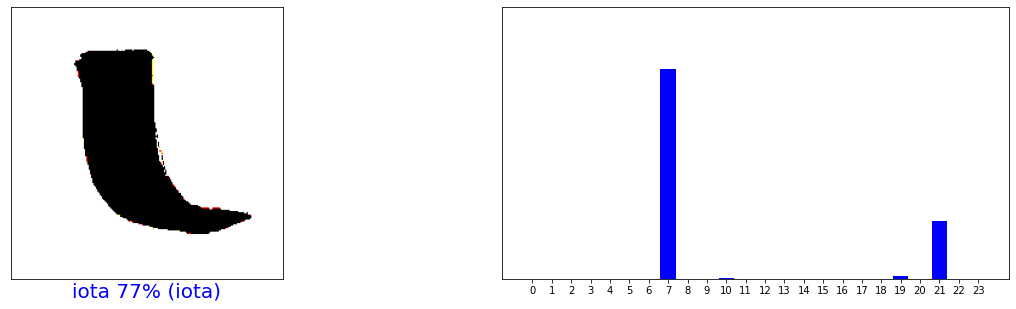

In [710]:
import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions[i], y_test)
plt.show()

# CNN with High quality greek letters dataset

In [268]:
import tensorflow as tf

model_CNN_high = Sequential()
model_CNN_high.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model_CNN_high.add(Conv2D(48, (3,3), input_shape = x_train.shape[1:]))
model_CNN_high.add(Activation("relu"))
model_CNN_high.add(MaxPooling2D(pool_size=(2,2)))

model_CNN_high.add(Conv2D(48, (3,3)))
model_CNN_high.add(Activation("relu"))
model_CNN_high.add(MaxPooling2D(pool_size=(2,2)))

model_CNN_high.add(Flatten())
model_CNN_high.add(Dense(48))

model_CNN_high.add(Dense(train_generator.num_classes))
model_CNN_high.add(Activation('Softmax'))

tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=2.5,
    momentum=0.20,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
model_CNN_high.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

model_CNN_high.fit(train_generator, epochs = 50)


Epoch 1/50
4/4 [==============================] - 6s 1s/step - loss: 34.0088 - accuracy: 0.0208
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 2.9040 - accuracy: 0.2812
Epoch 3/50
4/4 [==============================] - 5s 1s/step - loss: 2.1223 - accuracy: 0.4479
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 1.5587 - accuracy: 0.6042
Epoch 5/50
4/4 [==============================] - 5s 1s/step - loss: 0.8909 - accuracy: 0.7188
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 0.6642 - accuracy: 0.8021
Epoch 7/50
4/4 [==============================] - 5s 1s/step - loss: 0.4821 - accuracy: 0.9167
Epoch 8/50
4/4 [==============================] - 5s 1s/step - loss: 0.3069 - accuracy: 0.9479
Epoch 9/50
4/4 [==============================] - 5s 1s/step - loss: 0.1952 - accuracy: 0.9792
Epoch 10/50
4/4 [==============================] - 5s 1s/step - loss: 0.1926 - accuracy: 0.9583
Epoch 11/50
4/4 [==============================]

In [269]:
model_CNN_high.evaluate(x_valid, y_valid)

1/1 [==============================] - 0s 272ms/step - loss: 1.3295 - accuracy: 0.7500


[1.3295248746871948, 0.75]

In [304]:
results = model_CNN_high.evaluate(x_test, y_test)

1/1 [==============================] - 0s 256ms/step - loss: 1.9841 - accuracy: 0.7917


In [305]:
test_error.append(results[0])
test_acc.append(results[1])

In [711]:
predictions_CNN_high = model_CNN_high.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  2
true_label in boolean list = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 2


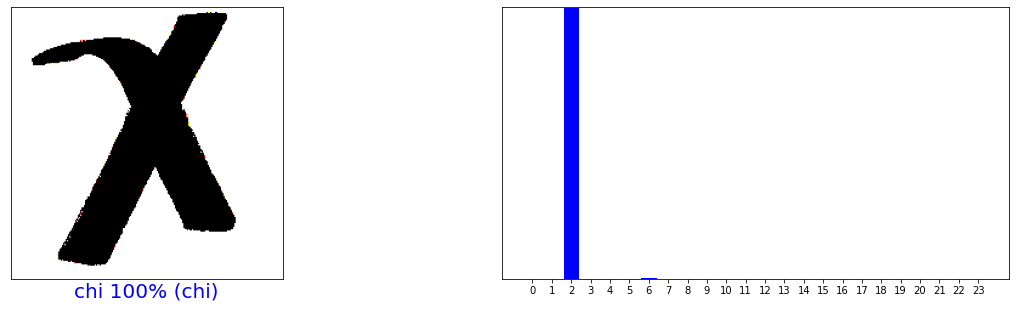

In [712]:
import numpy as np
i = 0
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_CNN_high[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_CNN_high[i], y_test)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  7
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 7


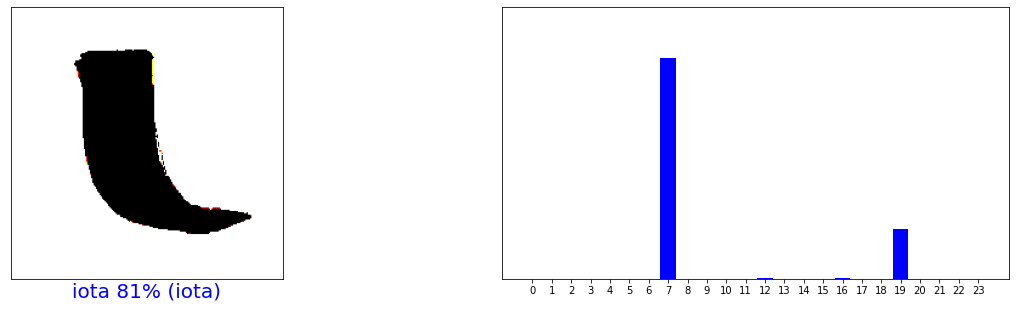

In [713]:
import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_CNN_high[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_CNN_high[i], y_test)
plt.show()

# RNN with High quality greek letters dataset

In [295]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LSTM

model_RNN = Sequential()
model_RNN.add(Flatten(input_shape=(img_height, img_width, 3)))
model_RNN.activation = 'softmax'
model_RNN.add(Dense(48, activation='relu'))

model_RNN.activation = 'softmax'
model_RNN.add(Dense(48, activation='relu'))
model_RNN.add(Dense(train_generator.num_classes, activation='softmax'))


tf.keras.optimizers.RMSprop(
    learning_rate=0.0001,
    rho=2.0,
    momentum=0.2,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
model_RNN.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])


model_RNN.fit(train_generator, epochs=50)

Epoch 1/50
4/4 [==============================] - 4s 926ms/step - loss: 16841.7832 - accuracy: 0.0521
Epoch 2/50
4/4 [==============================] - 4s 888ms/step - loss: 6031.1187 - accuracy: 0.0938
Epoch 3/50
4/4 [==============================] - 4s 889ms/step - loss: 2568.8735 - accuracy: 0.1771
Epoch 4/50
4/4 [==============================] - 4s 895ms/step - loss: 2440.2275 - accuracy: 0.1771
Epoch 5/50
4/4 [==============================] - 4s 891ms/step - loss: 1414.7423 - accuracy: 0.2708
Epoch 6/50
4/4 [==============================] - 4s 909ms/step - loss: 1256.9408 - accuracy: 0.2396
Epoch 7/50
4/4 [==============================] - 4s 892ms/step - loss: 1470.7101 - accuracy: 0.2812
Epoch 8/50
4/4 [==============================] - 4s 893ms/step - loss: 1126.7865 - accuracy: 0.2812
Epoch 9/50
4/4 [==============================] - 4s 913ms/step - loss: 1231.3319 - accuracy: 0.2292
Epoch 10/50
4/4 [==============================] - 4s 915ms/step - loss: 810.3591 - accura

In [296]:
model_RNN.evaluate(x_valid, y_valid, batch_size=24)

1/1 [==============================] - 0s 143ms/step - loss: 582.1274 - accuracy: 0.4583


[582.12744140625, 0.4583333432674408]

In [306]:
results = model_RNN.evaluate(x_test, y_test, batch_size=24)

1/1 [==============================] - 0s 53ms/step - loss: 724.4832 - accuracy: 0.5417


In [307]:
test_error.append(results[0])
test_acc.append(results[1])

In [714]:
predictions_RNN = model_RNN.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  23
true_label in boolean list = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 2


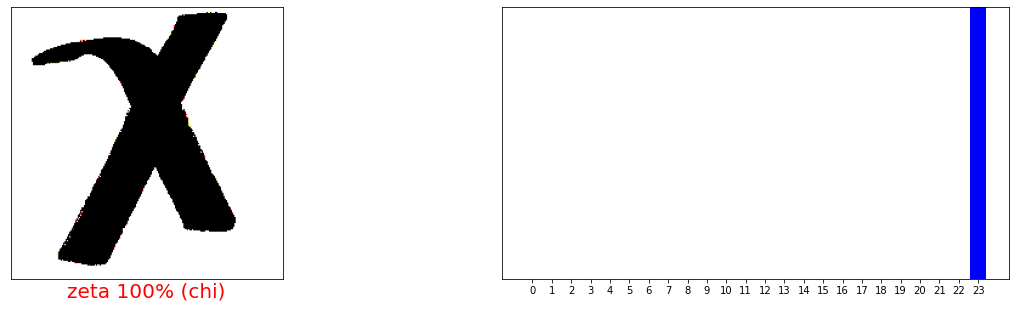

In [715]:
import numpy as np
i = 0
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_RNN[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_RNN[i], y_test)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  7
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 7


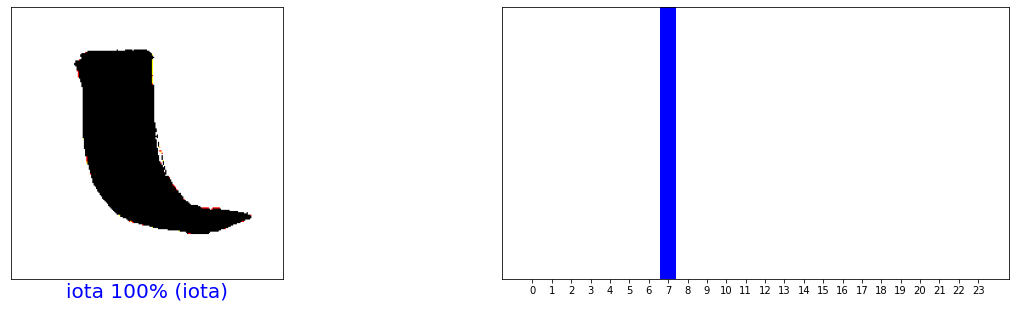

In [716]:
import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_RNN[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_RNN[i], y_test)
plt.show()

# Splitting the dataset into 2 sets Train and Validation (Low Quality Dataset)

In [762]:
input_folder = "D:\RHUL\project\Input_dataset_low"
output = "D:\RHUL\project\processed_data_low"
splitfolders.ratio(input_folder, output, seed=42, ratio=(0.6,0.4))

In [763]:
CATEGORIES = ["alpha","beta","chi","delta","epsilon","eta","gamma","iota","kappa","lambda","mu","nu","omega","omicron","phi","pi","psi","rho","sigma","tau","theta","upsilon","xi","zeta"]

In [764]:
img_height, img_width = (224,224)
batch_size = 24

train_data_dir = r"D:\RHUL\project\processed_data_low\train"
valid_data_dir = r"D:\RHUL\project\processed_data_low\val"
test_data_dir = r"D:\RHUL\project\test_low"

In [765]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=False,
                                  validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 95 images belonging to 24 classes.
Found 24 images belonging to 24 classes.


In [766]:
x_train, y_train = train_generator.next()

In [767]:
x_valid,y_valid = valid_generator.next()

In [768]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=False)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 96 images belonging to 24 classes.


In [769]:
x_test,y_test = test_generator.next()
x_test.shape

(24, 224, 224, 3)

# ResNet50 with Low quality greek letters dataset

In [ ]:
low_test_error = []
low_test_acc = []

In [331]:
model = ResNet50(include_top=False, weights='imagenet')
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model_ResNet50_low = Model(inputs=model.input, outputs=predictions)

for layer in model.layers:
    layer.trainable = False
    
model_ResNet50_low.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model_ResNet50_low.fit(train_generator, epochs = 50)

Epoch 1/50
4/4 [==============================] - 13s 3s/step - loss: 5.2994 - accuracy: 0.0211
Epoch 2/50
4/4 [==============================] - 11s 3s/step - loss: 4.2836 - accuracy: 0.0421
Epoch 3/50
4/4 [==============================] - 11s 3s/step - loss: 3.1570 - accuracy: 0.2421
Epoch 4/50
4/4 [==============================] - 11s 3s/step - loss: 2.3496 - accuracy: 0.4842
Epoch 5/50
4/4 [==============================] - 11s 3s/step - loss: 1.8724 - accuracy: 0.5263
Epoch 6/50
4/4 [==============================] - 11s 3s/step - loss: 1.6872 - accuracy: 0.4526
Epoch 7/50
4/4 [==============================] - 11s 3s/step - loss: 1.2715 - accuracy: 0.7579
Epoch 8/50
4/4 [==============================] - 11s 3s/step - loss: 1.1935 - accuracy: 0.6947
Epoch 9/50
4/4 [==============================] - 11s 3s/step - loss: 0.9414 - accuracy: 0.8316
Epoch 10/50
4/4 [==============================] - 11s 3s/step - loss: 0.9158 - accuracy: 0.7789
Epoch 11/50
4/4 [======================

In [471]:
model_ResNet50_low.evaluate(x_valid, y_valid)

1/1 [==============================] - 7s 7s/step - loss: 0.5735 - accuracy: 0.7500


[0.5735424160957336, 0.75]

In [493]:
results = model_ResNet50_low.evaluate(x_test, y_test)

1/1 [==============================] - 6s 6s/step - loss: 0.5684 - accuracy: 0.8750


In [494]:
low_test_error.append(results[0])
low_test_acc.append(results[1])

In [770]:
predictions = model_ResNet50_low.predict(x_test)

In [771]:
np.argmax(predictions[0])

8

In [772]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [773]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    print("predicted_label = ",predicted_label)
    l = list(true_label) 
    print("true_label in boolean list =",l)
    n = list(true_label).index(1)
    print("true_label after converting to integer =",n)
    if predicted_label == n:
        color = 'blue' 
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(CATEGORIES[predicted_label],
                                100*np.max(predictions_array),
                                CATEGORIES[n]),
                                color=color)


def plot_prediction_array(i, predictions_array, true_label):
    true_label = any(true_label[i])
    plt.grid(False)
    plt.xticks(range(24))
    plt.yticks([])
    thisplot = plt.bar(range(24), predictions_array, color="blue")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  8
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 8


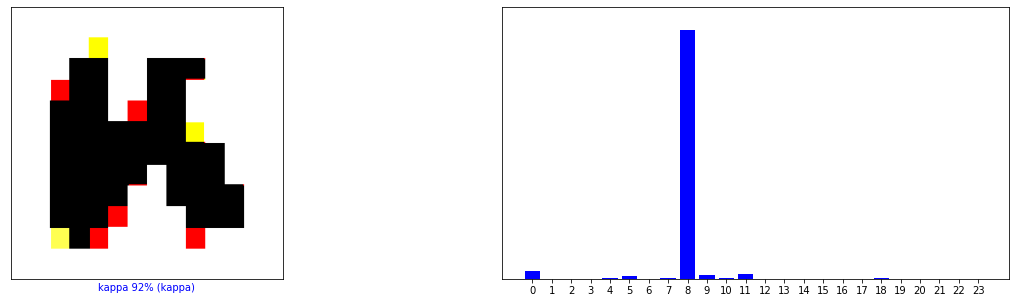

In [774]:
import numpy as np
i = 0
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions[i], y_test)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  11
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 11


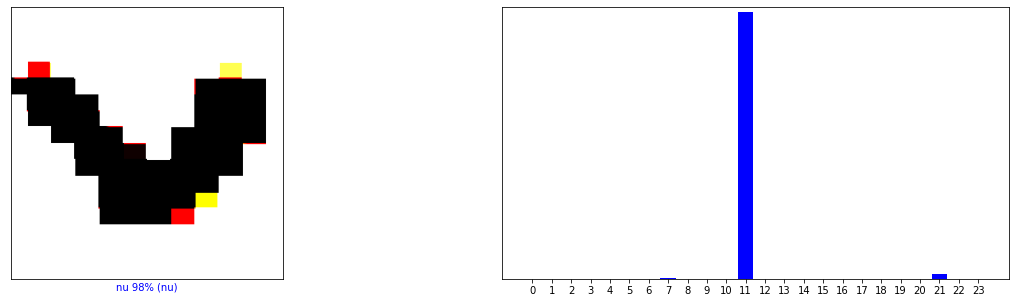

In [775]:
import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions[i], y_test)
plt.show()

# CNN with Low quality greek letters dataset

In [209]:
import tensorflow as tf

model_CNN= Sequential()
model_CNN.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model_CNN.add(Conv2D(48, (3,3)))
model_CNN.add(Activation("relu"))
model_CNN.add(MaxPooling2D(pool_size=(3,3)))

model_CNN.add(Conv2D(48, (3,3)))
model_CNN.add(Activation("relu"))
model_CNN.add(MaxPooling2D(pool_size=(3,3)))

model_CNN.add(Flatten())

model_CNN.add(Dense(24))
model_CNN.add(Activation('sigmoid'))

tf.keras.optimizers.RMSprop(
    learning_rate=0.0001,
    rho=30.5,
    momentum=0.30,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)

model_CNN.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics = ['accuracy'])

model_CNN.fit(train_generator, epochs = 100)

Epoch 1/100
4/4 [==============================] - 2s 508ms/step - loss: 4.0582 - accuracy: 0.1474
Epoch 2/100
4/4 [==============================] - 2s 490ms/step - loss: 2.9453 - accuracy: 0.1579
Epoch 3/100
4/4 [==============================] - 2s 496ms/step - loss: 2.1314 - accuracy: 0.4421
Epoch 4/100
4/4 [==============================] - 2s 499ms/step - loss: 1.3794 - accuracy: 0.5579
Epoch 5/100
4/4 [==============================] - 2s 505ms/step - loss: 0.8972 - accuracy: 0.7474
Epoch 6/100
4/4 [==============================] - 2s 504ms/step - loss: 0.8745 - accuracy: 0.7053
Epoch 7/100
4/4 [==============================] - 2s 492ms/step - loss: 0.5115 - accuracy: 0.8316
Epoch 8/100
4/4 [==============================] - 2s 493ms/step - loss: 0.5557 - accuracy: 0.8421
Epoch 9/100
4/4 [==============================] - 2s 498ms/step - loss: 0.4251 - accuracy: 0.9368
Epoch 10/100
4/4 [==============================] - 2s 504ms/step - loss: 0.4414 - accuracy: 0.8421
Epoch 11/

In [210]:
model_CNN.evaluate(x_valid, y_valid)

1/1 [==============================] - 0s 195ms/step - loss: 1.0628 - accuracy: 0.7917


[1.062839150428772, 0.7916666865348816]

In [502]:
results = model_CNN.evaluate(x_test, y_test)

1/1 [==============================] - 0s 237ms/step - loss: 2.6235 - accuracy: 0.7083


In [503]:
low_test_error.append(results[0])
low_test_acc.append(results[1])

In [776]:
predictions_CNN_low = model_CNN.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  8
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 8


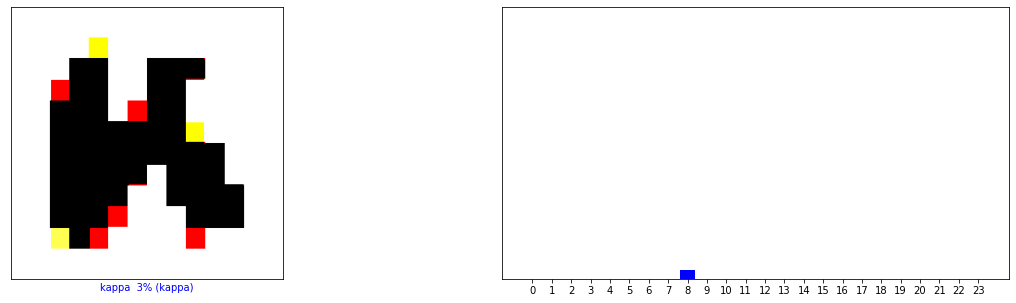

In [777]:
import numpy as np
i = 0
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_CNN_low[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_CNN_low[i], y_test)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  11
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 11


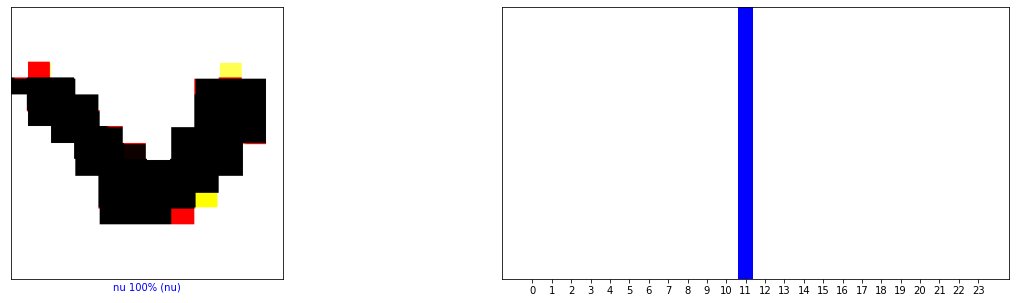

In [778]:
import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_CNN_low[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_CNN_low[i], y_test)
plt.show()

# RNN with Low quality greek letters dataset

In [570]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LSTM

model_RNN_low = Sequential()
model_RNN_low.add(Flatten(input_shape=x_train.shape[1:]))
model_RNN_low.activation = 'relu'
model_RNN_low.activation = 'sigmoig'
model_RNN_low.add(Dense(48, activation='relu'))

model_RNN_low.activation = 'softmax'
model_RNN_low.add(Dense(48, activation='relu'))
model_RNN_low.add(Dense(train_generator.num_classes, activation='softmax'))

tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=2.0,
    momentum=0.2,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
model_RNN_low.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])



model_RNN_low.fit(train_generator, epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 233ms/step - loss: 12462.0342 - accuracy: 0.0316
Epoch 2/50
4/4 [==============================] - 1s 235ms/step - loss: 8261.6650 - accuracy: 0.0632
Epoch 3/50
4/4 [==============================] - 1s 235ms/step - loss: 3252.9612 - accuracy: 0.1158
Epoch 4/50
4/4 [==============================] - 1s 245ms/step - loss: 3517.0027 - accuracy: 0.1263
Epoch 5/50
4/4 [==============================] - 1s 241ms/step - loss: 2043.9796 - accuracy: 0.2316
Epoch 6/50
4/4 [==============================] - 1s 240ms/step - loss: 1737.8696 - accuracy: 0.1789
Epoch 7/50
4/4 [==============================] - 1s 233ms/step - loss: 1358.2909 - accuracy: 0.2632
Epoch 8/50
4/4 [==============================] - 1s 238ms/step - loss: 1551.6881 - accuracy: 0.2105
Epoch 9/50
4/4 [==============================] - 1s 236ms/step - loss: 1099.5245 - accuracy: 0.3474
Epoch 10/50
4/4 [==============================] - 1s 238ms/step - loss: 1865.8663 - accur

In [571]:
model_RNN_low.evaluate(x_valid, y_valid)

1/1 [==============================] - 0s 99ms/step - loss: 736.7020 - accuracy: 0.4583


[736.7019653320312, 0.4583333432674408]

In [572]:
results = model_RNN_low.evaluate(x_test, y_test)

1/1 [==============================] - 0s 42ms/step - loss: 1069.0248 - accuracy: 0.5417


In [573]:
results

[1069.0247802734375, 0.5416666865348816]

In [574]:
low_test_error.append(results[0])
low_test_acc.append(results[1])

In [779]:
predictions_RNN_low = model_RNN_low.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  8
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 8


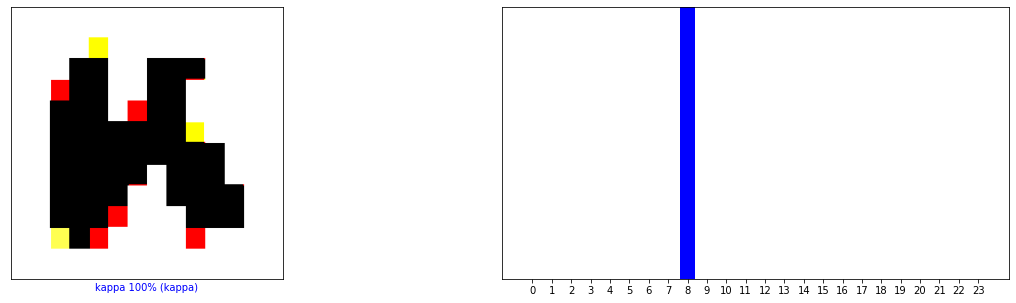

In [780]:
import numpy as np
i = 0
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_RNN_low[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_RNN_low[i], y_test)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  7
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 11


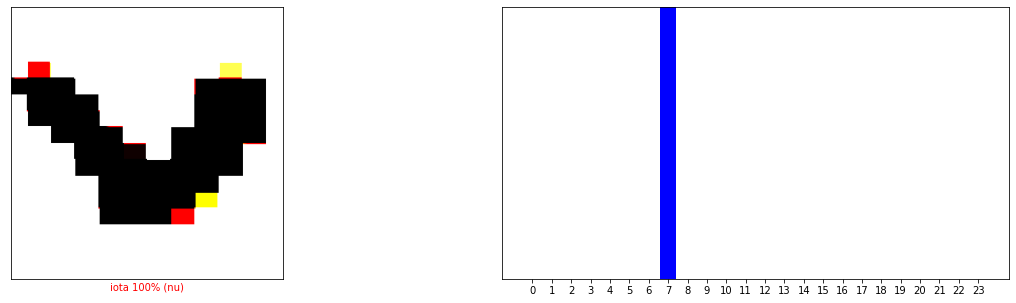

In [781]:
import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_RNN_low[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_RNN_low[i], y_test)
plt.show()

In [598]:
low_test_error

[0.5683839321136475, 2.6235358715057373, 1069.0247802734375]

In [581]:
test_error

[0.18277740478515625, 1.984134316444397, 724.483154296875]

In [586]:
low_test_acc

[0.875, 0.7083333134651184, 0.5416666865348816]

In [583]:
test_acc

[0.9583333134651184, 0.7916666865348816, 0.5416666865348816]

# Extra testing

# ResNet50 model trained on High resolution training dataset tested on low resolution test dataset

In [634]:
r = model_ResNet50_high.evaluate(x_test, y_test)

1/1 [==============================] - 3s 3s/step - loss: 4.8524 - accuracy: 0.0833


In [637]:
predictions_1 = model_ResNet50_high.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  22
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 13


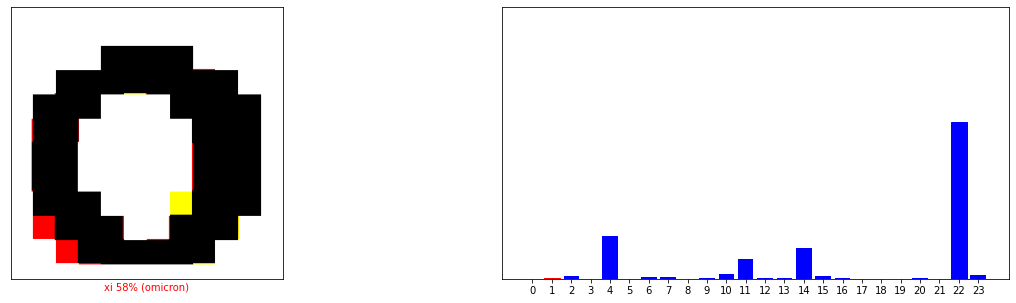

In [642]:
import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_1[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_1[i], y_test)
plt.show()

# CNN model trained on High resolution training dataset tested on low resolution test dataset

In [646]:
r2 = model_CNN_high.evaluate(x_test, y_test)

1/1 [==============================] - 0s 167ms/step - loss: 1.9516 - accuracy: 0.6250


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  13
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 13


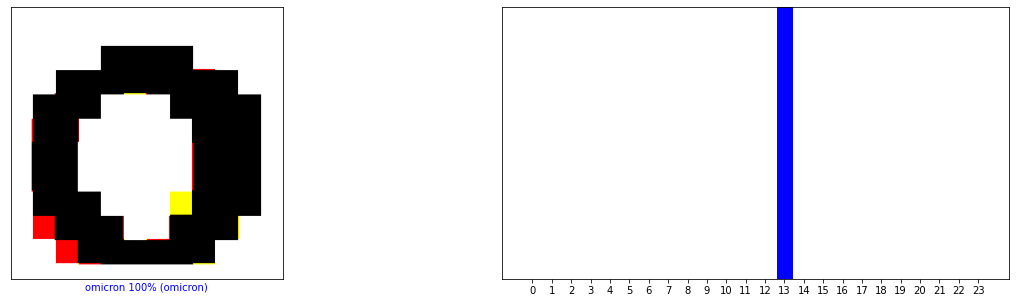

In [647]:
predictions_2 = model_CNN_high.predict(x_test)

import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_2[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_2[i], y_test)
plt.show()

# RNN model trained on High resolution training dataset tested on low resolution test dataset

In [648]:
r3 = model_RNN.evaluate(x_test, y_test)

1/1 [==============================] - 0s 38ms/step - loss: 805.0773 - accuracy: 0.4167


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  0
true_label in boolean list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 13


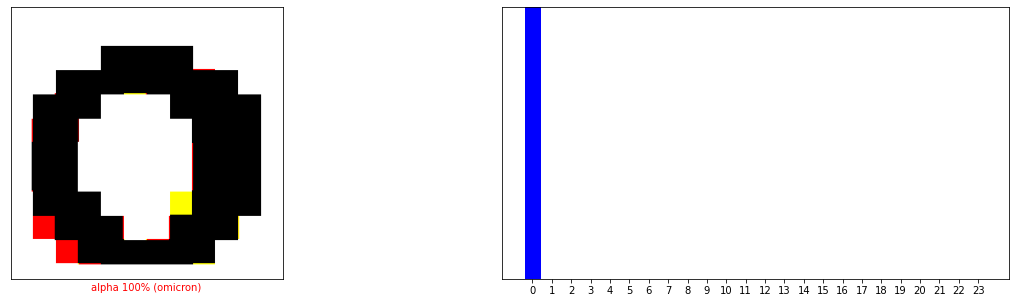

In [649]:
predictions_3 = model_RNN.predict(x_test)

import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_3[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_3[i], y_test)
plt.show()

# ResNet50 model trained on low resolution training dataset tested on high resolution test dataset

In [660]:
r4 = model_ResNet50_low.evaluate(x_test, y_test)

1/1 [==============================] - 3s 3s/step - loss: 9.5072 - accuracy: 0.1250


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  3
true_label in boolean list = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 2


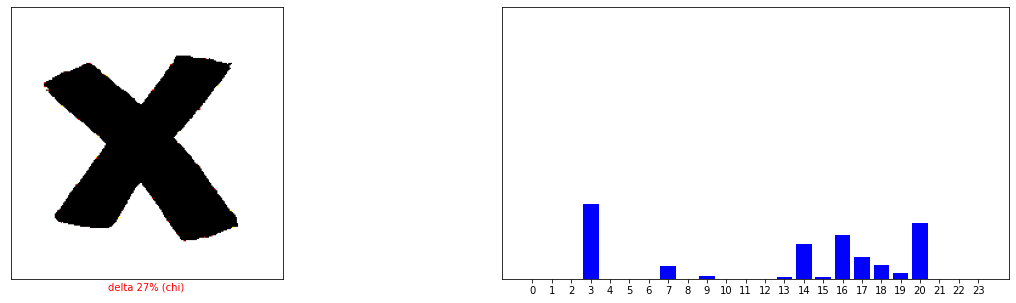

In [661]:
predictions_4 = model_ResNet50_low.predict(x_test)

import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_4[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_4[i], y_test)
plt.show()

# CNN model trained on low resolution training dataset tested on high resolution test dataset

In [662]:
r5 = model_CNN.evaluate(x_test, y_test)

1/1 [==============================] - 0s 119ms/step - loss: 3.5089 - accuracy: 0.5833


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  8
true_label in boolean list = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 2


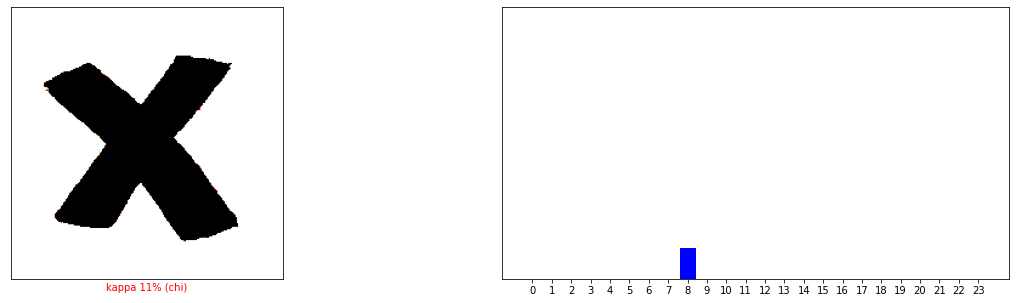

In [663]:
predictions_5 = model_CNN.predict(x_test)

import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_5[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_5[i], y_test)
plt.show()

# RNN model trained on low resolution training dataset tested on high resolution test dataset

In [664]:
r6 = model_RNN_low.evaluate(x_test, y_test)

1/1 [==============================] - 0s 42ms/step - loss: 853.2539 - accuracy: 0.5000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predicted_label =  2
true_label in boolean list = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_label after converting to integer = 2


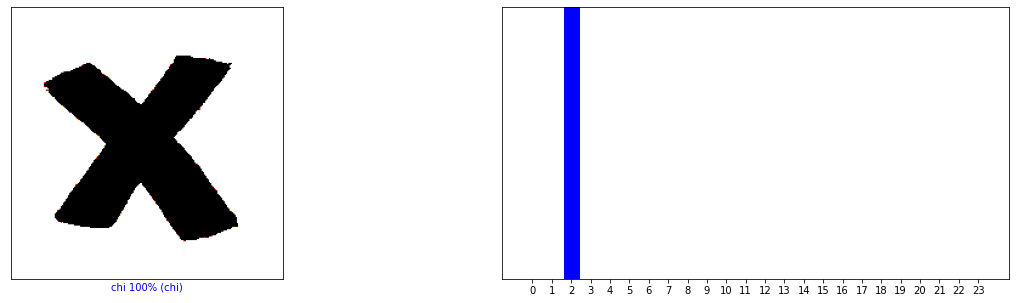

In [665]:
predictions_6 = model_RNN_low.predict(x_test)

import numpy as np
i = 23
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plot_image(i, predictions_6[i], y_test,x_test)
plt.subplot(1,2,2)
plot_prediction_array(i, predictions_6[i], y_test)
plt.show()

# Accuracy for Low and High Quality Data (ResNet50)

In [782]:
low = low_test_acc[0]
high = test_acc[0]
bar = [low,high]

<AxesSubplot:>

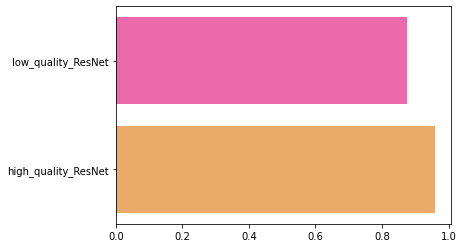

In [783]:
import seaborn as sns
sns.barplot(x = bar,y = ["low_quality_ResNet","high_quality_ResNet"],palette = "spring")

# Accuracy for Low and High Quality Data (CNN)

<AxesSubplot:>

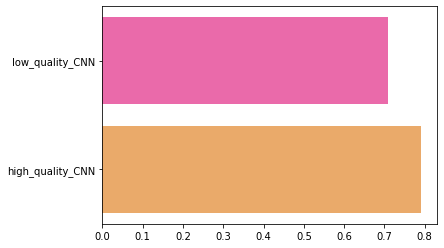

In [784]:
low = low_test_acc[1]
high = test_acc[1]
bar = [low,high]
sns.barplot(x = bar,y = ["low_quality_CNN","high_quality_CNN"],palette = "spring")

# Accuracy for Low and High Quality Data (RNN)

<AxesSubplot:>

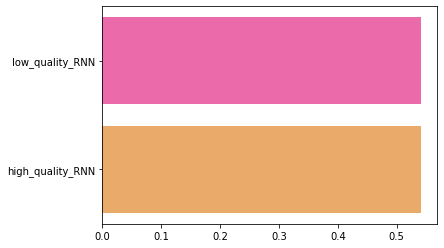

In [785]:
low = low_test_acc[2]
high = test_acc[2]
bar = [low,high]
sns.barplot(x = bar,y = ["low_quality_RNN","high_quality_RNN"],palette = "spring")

# Error for Low and High Quality Data (ResNet50)

<AxesSubplot:>

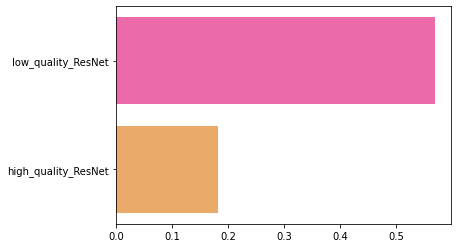

In [786]:
low = low_test_error[0]
high = test_error[0]
bar = [low,high]
sns.barplot(x = bar,y = ["low_quality_ResNet","high_quality_ResNet"],palette = "spring")

# Error for Low and High Quality Data (CNN)

<AxesSubplot:>

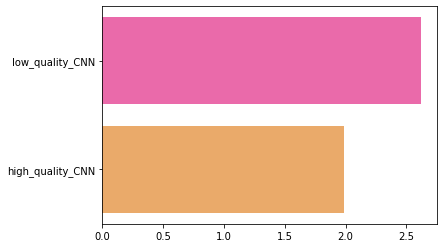

In [787]:
low = low_test_error[1]
high = test_error[1]
bar = [low,high]
sns.barplot(x = bar,y = ["low_quality_CNN","high_quality_CNN"],palette = "spring")

# Error for Low and High Quality Data (RNN)

<AxesSubplot:>

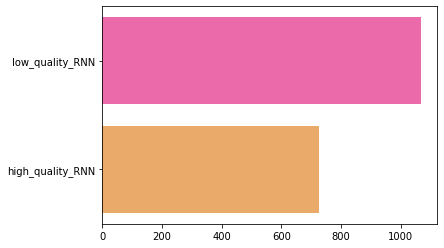

In [788]:
low = low_test_error[2]
high = test_error[2]
bar = [low,high]
sns.barplot(x = bar,y = ["low_quality_RNN","high_quality_RNN"],palette = "spring")

In [789]:
bar

[1069.0247802734375, 724.483154296875]

# Error for Low and High Quality

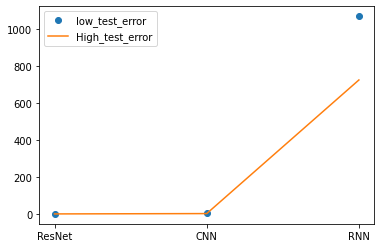

In [790]:
plt.plot(["ResNet","CNN","RNN"],low_test_error,"o")
plt.plot(["ResNet","CNN","RNN"],test_error)
plt.legend(['low_test_error',"High_test_error"])

# Accuracy for Low and High Quality

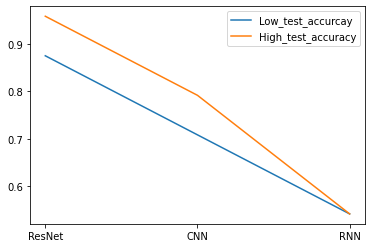

In [791]:
plt.plot(["ResNet","CNN","RNN"],low_test_acc)
plt.plot(["ResNet","CNN","RNN"],test_acc)
plt.legend(['Low_test_accurcay',"High_test_accuracy"])